Overall Goal: The code aims to analyze text reviews to identify the underlying emotion expressed. It uses a pre-trained model from Hugging Face, visualizes the results, and provides an interactive interface for real-time emotion detection.

Workflow Breakdown:

Setup and Environment Preparation:

Install Libraries: Necessary Python libraries are installed:
transformers: From Hugging Face, to easily download and use pre-trained state-of-the-art NLP models.
pandas: For creating and manipulating structured data (DataFrames).
matplotlib: For creating static plots and visualizations.
seaborn: (Though not directly used in plotting commands, often imported alongside matplotlib for enhanced aesthetics or specific plot types).
wordcloud: For generating visual representations of word frequencies in text.
Import Modules: Relevant modules from these libraries and standard Python libraries (like numpy, collections.Counter) are imported.

Data Creation and Loading:

Create Synthetic Dataset:
A small, synthetic dataset of English product reviews is created directly in the code. This dataset includes:
Text: The review text itself.
Score: A numerical score (e.g., 1 to 5) associated with the review, representing user satisfaction.
Create DataFrame: The synthetic data is converted into a Pandas DataFrame for easier manipulation and analysis.
Display Dataset: The created DataFrame is printed to show its initial content.

Text Preprocessing:

Define Preprocessing Function (preprocess_text):

A simple function is defined to clean the review texts. It performs:
Lowercasing: Converts text to lowercase.
Stripping Whitespace: Removes leading and trailing whitespace.
Apply Preprocessing: The preprocess_text function is applied to the 'Text' column of the DataFrame, ensuring consistency before feeding the text to the model.

Emotion Classification using a Pre-trained Model:

Load Pre-trained Model:
A pre-trained emotion classification model (bhadresh-savani/bert-base-uncased-emotion) is loaded using the pipeline function from the transformers library. This pipeline handles the complexities of tokenization, model inference, and output formatting.
Define Classification Function (classify_emotion): A function is created that takes a text string as input, passes it to the loaded emotion_classifier pipeline, and returns the predicted emotion label (e.g., "joy", "sadness", "anger").
Apply Emotion Classification: The classify_emotion function is applied to each preprocessed review in the 'Text' column of the DataFrame. The predicted emotion for each review is stored in a new column called predicted_emotion.
Display Results: A sample of the DataFrame, showing the original text and its corresponding predicted emotion, is printed.

Data Visualization and Analysis:

Emotion Frequency:

A bar chart is generated using matplotlib to show the frequency (count) of each predicted emotion across all reviews in the dataset. This helps understand the overall emotional tone of the reviews.
Word Clouds per Emotion:
A function generate_wordcloud is defined to create a word cloud for a given set of texts associated with a specific emotion.
The code iterates through each unique predicted emotion. For each emotion, it gathers all the review texts classified with that emotion and generates a word cloud. Word clouds visually represent the most frequent words in a body of text.
Score vs. Predicted Emotion: A bar chart is created to show the average 'Score' given by users for reviews associated with each predicted emotion. This helps explore potential correlations between the expressed emotion and the user's satisfaction rating.

Interactive User Interface (using ipywidgets):

Create Widgets: Similar to the previous script, interactive elements are created:

A text input field (widgets.Text) for users to type a new review.
A "Send" button (widgets.Button).
An output area (widgets.Output) to display the input and the detected emotion.
Define Event Handler (on_send_button_clicked): A function is defined to execute when the "Enviar" (Send) button is clicked. This function:
Retrieves the text from the input field.
Preprocesses the input text (lowercase, strip).
Uses the classify_emotion function (which utilizes the pre-trained Hugging Face model) to predict the emotion of the input text.
Displays the user's input and the detected emotion in the output area.
Clears the input field for the next entry.
Display Interface: The widgets are arranged vertically and displayed in the Colab notebook, allowing users to interactively test the emotion classification model with their own text inputs.

Dataset sintético de reviews em inglês:
                                                 Text  Score
0   I loved the product! It works perfectly and ar...      5
1   Terrible quality. I do not recommend it to any...      1
2   The product is good, but the customer service ...      3
3   I am very satisfied with the purchase. It was ...      5
4   I didn't like it. The product broke after a we...      2
5               Amazing! It exceeded my expectations.      5
6   It took too long to arrive and came with a def...      2
7              Great value for money. I recommend it!      4
8      The product is decent, but it could be better.      3
9   Horrible! I will never buy from this brand again.      1
10  I am happy with the purchase. The product met ...      4
11            Very bad. It doesn't work as described.      1
12     Excellent product! I recommend it to everyone.      5
13    The product is good, but the price is too high.      3
14     It didn't meet my expectations. Disapp

Device set to use cpu



Exemplo de classificação:
                                                Text predicted_emotion
0  i loved the product! it works perfectly and ar...               joy
1  terrible quality. i do not recommend it to any...           sadness
2  the product is good, but the customer service ...           sadness
3  i am very satisfied with the purchase. it was ...               joy
4  i didn't like it. the product broke after a we...           sadness
5              amazing! it exceeded my expectations.               joy
6  it took too long to arrive and came with a def...           sadness
7             great value for money. i recommend it!               joy
8     the product is decent, but it could be better.               joy
9  horrible! i will never buy from this brand again.           sadness


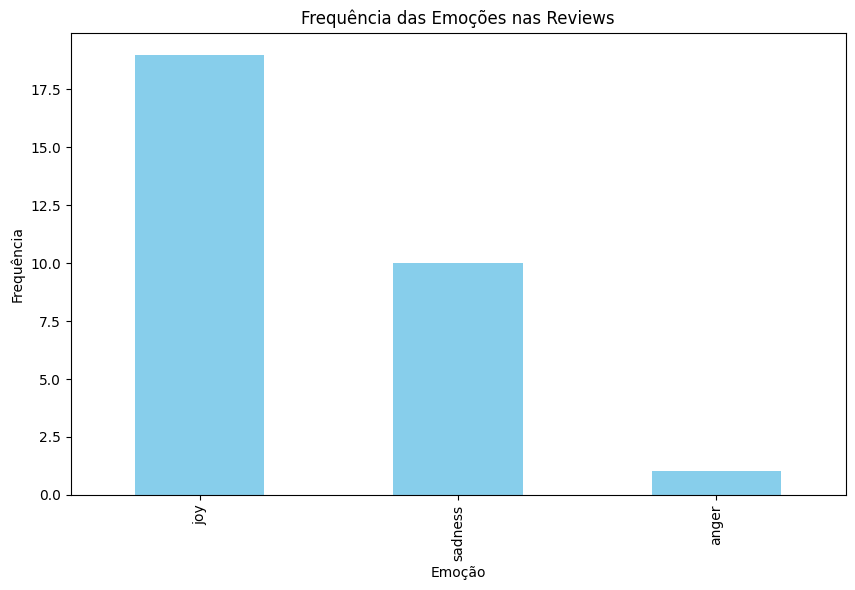

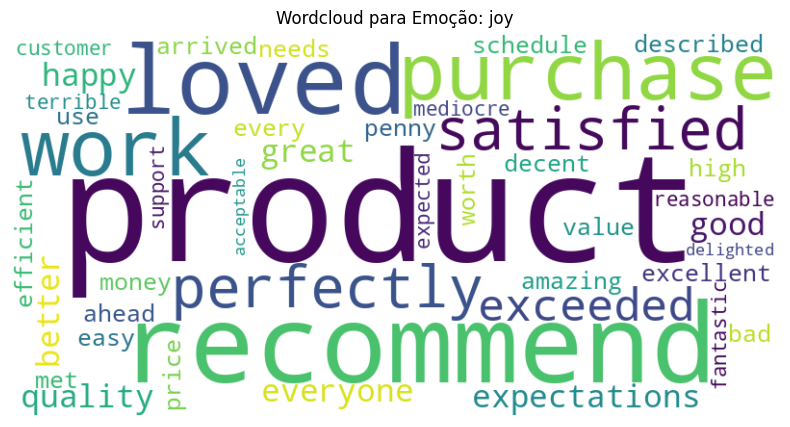

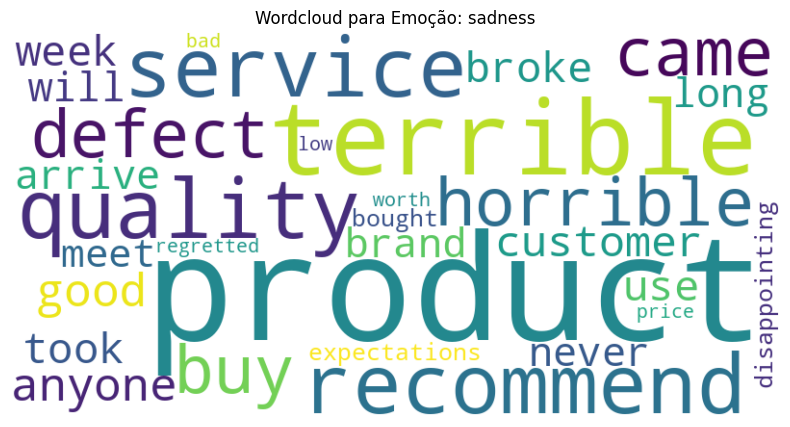

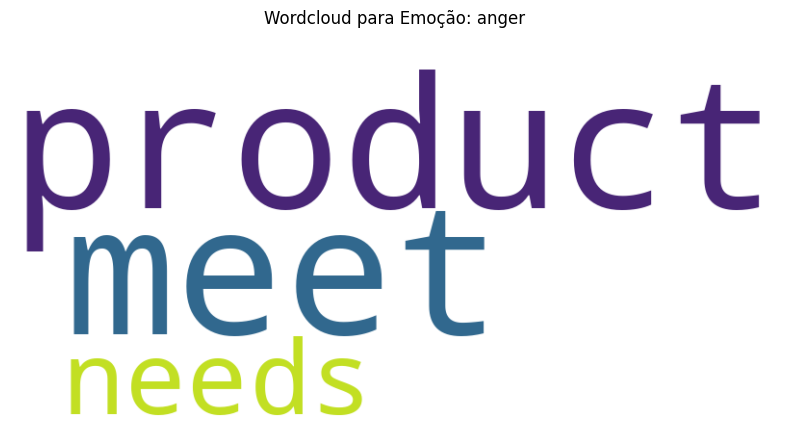

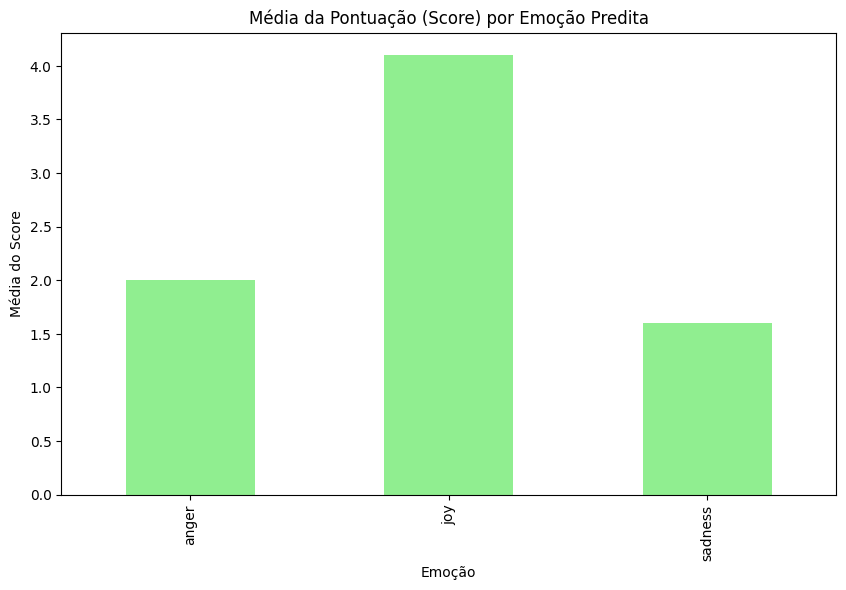

In [ ]:
# Passo 1: Instalar bibliotecas necessárias
!pip install transformers
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

# Passo 2: Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from transformers import pipeline

# Passo 3: Criar um dataset sintético de reviews em inglês
data = {
    'Text': [
        "I loved the product! It works perfectly and arrived ahead of schedule.",
        "Terrible quality. I do not recommend it to anyone.",
        "The product is good, but the customer service was horrible.",
        "I am very satisfied with the purchase. It was worth every penny.",
        "I didn't like it. The product broke after a week of use.",
        "Amazing! It exceeded my expectations.",
        "It took too long to arrive and came with a defect.",
        "Great value for money. I recommend it!",
        "The product is decent, but it could be better.",
        "Horrible! I will never buy from this brand again.",
        "I am happy with the purchase. The product met my needs.",
        "Very bad. It doesn't work as described.",
        "Excellent product! I recommend it to everyone.",
        "The product is good, but the price is too high.",
        "It didn't meet my expectations. Disappointing.",
        "I loved it! Easy to use and very efficient.",
        "The product is reasonable, but the customer support is terrible.",
        "I bought it and regretted it. It's not worth the price.",
        "Great quality! I am very satisfied.",
        "The product is mediocre. I expected more.",
        "Fantastic! It works perfectly.",
        "I didn't like it. The product didn't meet my needs.",
        "Very good! I recommend it to everyone.",
        "The product is bad. I wouldn't buy it again.",
        "I am delighted with the quality of the product.",
        "Terrible service and low-quality product.",
        "I loved it! It exceeded all my expectations.",
        "The product is acceptable, but it could be better.",
        "I do not recommend it. The product came with a defect.",
        "I am very happy with the purchase. I recommend it!"
    ],
    'Score': [5, 1, 3, 5, 2, 5, 2, 4, 3, 1, 4, 1, 5, 3, 2, 5, 3, 2, 5, 3, 5, 2, 4, 1, 5, 1, 5, 3, 1, 5]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Visualizar o dataset
print("Dataset sintético de reviews em inglês:")
print(df)

# Passo 4: Pré-processamento de texto
def preprocess_text(text):
    # Converter para minúsculas e remover espaços extras
    text = text.lower().strip()
    return text

# Aplicar pré-processamento à coluna de texto
df['Text'] = df['Text'].apply(preprocess_text)

# Passo 5: Classificação de emoções usando um modelo pré-treinado
# Usaremos o pipeline de classificação de emoções da Hugging Face
emotion_classifier = pipeline('text-classification', model='bhadresh-savani/bert-base-uncased-emotion')

# Função para classificar emoções
def classify_emotion(text):
    result = emotion_classifier(text)
    return result[0]['label']

# Aplicar a classificação ao dataset
df['predicted_emotion'] = df['Text'].apply(classify_emotion)

# Visualizar resultados
print("\nExemplo de classificação:")
print(df[['Text', 'predicted_emotion']].head(10))

# Passo 6: Visualizações

# 1. Frequência das emoções nas reviews classificadas
plt.figure(figsize=(10, 6))
df['predicted_emotion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequência das Emoções nas Reviews')
plt.xlabel('Emoção')
plt.ylabel('Frequência')
plt.show()

# 2. Wordcloud para cada emoção
def generate_wordcloud(emotion, text_data):
    text = ' '.join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Wordcloud para Emoção: {emotion}')
    plt.axis('off')
    plt.show()

# Gerar wordclouds para cada emoção
emotions = df['predicted_emotion'].unique()
for emotion in emotions:
    emotion_texts = df[df['predicted_emotion'] == emotion]['Text']
    if not emotion_texts.empty:
        generate_wordcloud(emotion, emotion_texts)

# 3. Relação entre a pontuação (Score) e a emoção predita
plt.figure(figsize=(10, 6))
df.groupby('predicted_emotion')['Score'].mean().plot(kind='bar', color='lightgreen')
plt.title('Média da Pontuação (Score) por Emoção Predita')
plt.xlabel('Emoção')
plt.ylabel('Média do Score')
plt.show()

# Add a chat interface for testing new entries using ipywidgets
import ipywidgets as widgets
from IPython.display import display

# Create an output widget to display the conversation
chat_output = widgets.Output()

# Create a text input widget for new review entries
text_input = widgets.Text(
    placeholder='Digite sua review para análise...',
    description='Entrada:',
    layout=widgets.Layout(width='100%')
)

# Create a button widget to send the message
send_button = widgets.Button(
    description='Enviar',
    button_style='success'
)

# Define the event handler for the send button
def on_send_button_clicked(b):
    user_text = text_input.value.strip()
    if user_text:
        with chat_output:
            # Display the user input
            print("Usuário:", user_text)
            # Preprocess the text
            processed_text = user_text.lower().strip()
            # Classify the emotion using the pre-defined function
            emotion = classify_emotion(processed_text)
            print("Emoção detectada:", emotion)
            print("-" * 40)
        # Clear the text input for the next entry
        text_input.value = ""

# Attach the event handler to the button
send_button.on_click(on_send_button_clicked)

# Arrange the widgets in a vertical layout and display the interface
chat_interface = widgets.VBox([text_input, send_button, chat_output])
display(chat_interface)